In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

In [2]:
df = pd.read_csv('syria_indicators_wide.csv')

In [3]:
df.head()

,Country Name,Year,Education (Tertiary),GDP,Inflation,Life Expectancy,Population,Unemployment
0,Syrian Arab Republic,1960,NaN,8.577044e+08,5.118910,52.723,4673500.0,NaN
1,Syrian Arab Republic,1961,NaN,9.452450e+08,1.958891,53.652,4815466.0,NaN
2,Syrian Arab Republic,1962,NaN,1.110566e+09,-3.846154,54.569,4959340.0,NaN
3,Syrian Arab Republic,1963,NaN,1.200447e+09,1.916667,55.394,5110467.0,NaN
4,Syrian Arab Republic,1964,NaN,1.339494e+09,5.396566,56.170,5269087.0,NaN


In [4]:
df.shape

(65, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          65 non-null     object 
 1   Year                  65 non-null     int64  
 2   Education (Tertiary)  47 non-null     float64
 3   GDP                   63 non-null     float64
 4   Inflation             60 non-null     float64
 5   Life Expectancy       64 non-null     float64
 6   Population            64 non-null     float64
 7   Unemployment          34 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.2+ KB


In [6]:
df.describe()

,Year,Education (Tertiary),GDP,Inflation,Life Expectancy,Population,Unemployment
count,65.00000,47.000000,6.300000e+01,60.000000,64.000000,6.400000e+01,34.000000
mean,1992.00000,101.139084,1.614298e+10,11.373615,66.572484,1.350572e+07,10.589206
std,18.90767,14.256719,1.458020e+10,13.066768,5.665700,6.106756e+06,2.927084
min,1960.00000,69.799942,8.577044e+08,-3.878976,52.723000,4.673500e+06,6.750000
25%,1976.00000,91.593678,7.230255e+09,3.595036,63.397000,7.751581e+06,7.735000
50%,1992.00000,105.830627,1.329321e+10,7.610154,67.885500,1.318320e+07,9.933500
75%,2008.00000,109.132931,2.045319e+10,15.378421,70.884500,1.927466e+07,13.462750
max,2024.00000,120.943916,6.753943e+10,59.484368,73.542000,2.359462e+07,15.191000


In [8]:
df.columns

Index(['Country Name', 'Year', 'Education (Tertiary)', 'GDP', 'Inflation',
       'Life Expectancy', 'Population', 'Unemployment'],
      dtype='object')

In [14]:
df.rename(columns={ 'Education (Tertiary)': 'School enrollment',}, inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isna().sum()

Country Name          0
Year                  0
School enrollment    18
GDP                   2
Inflation             5
Life Expectancy       1
Population            1
Unemployment         31
dtype: int64

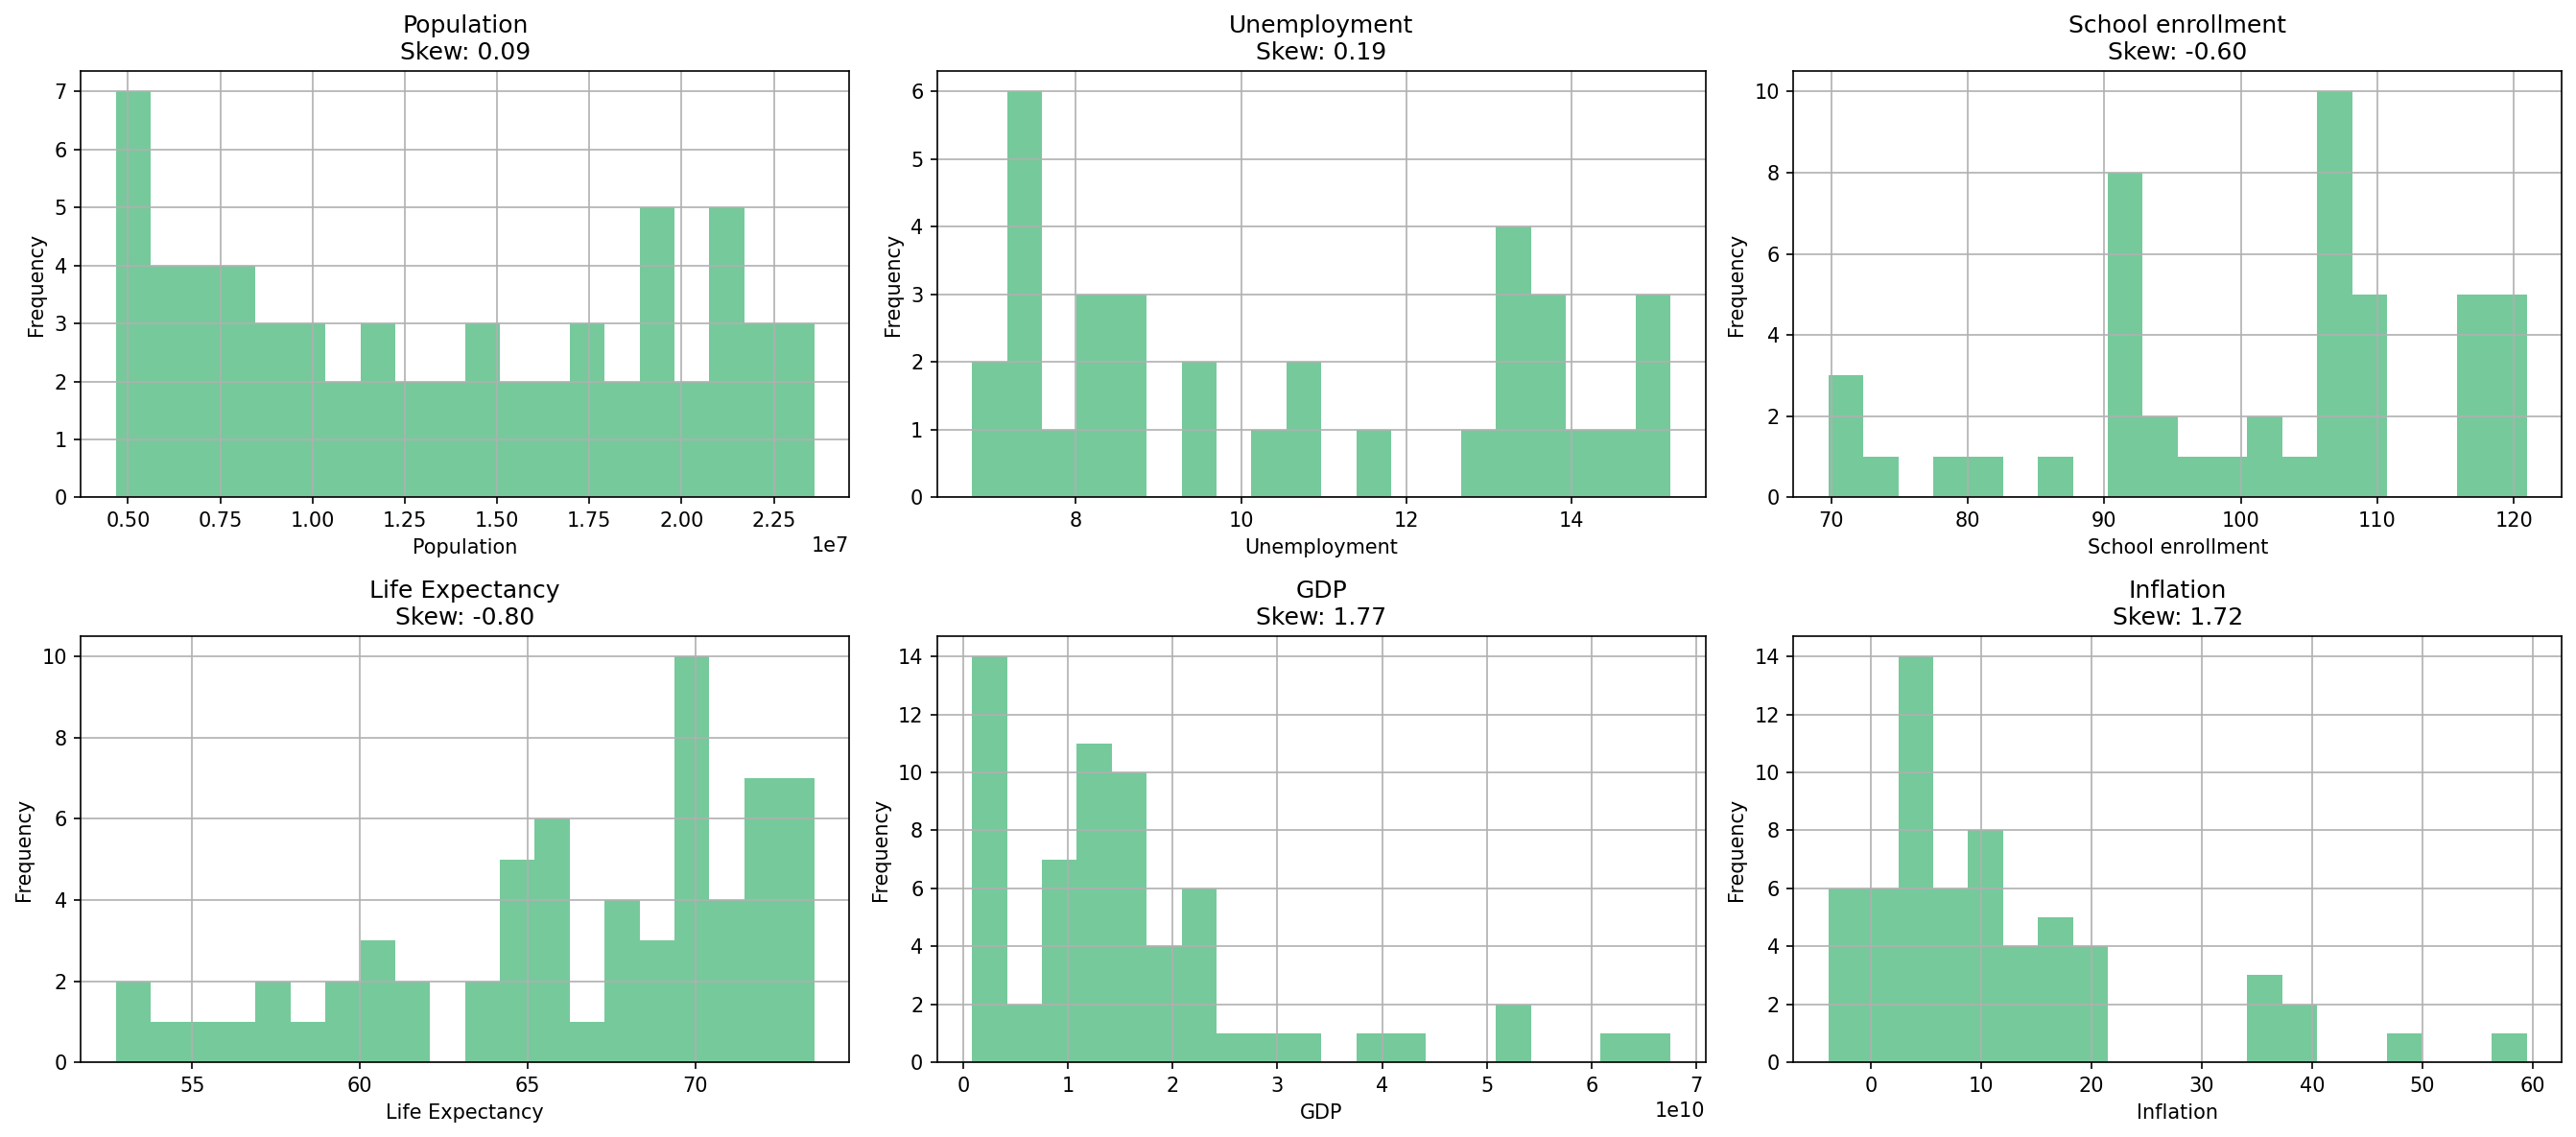

In [18]:

columns = ['Population', 'Unemployment', 'School enrollment', 'Life Expectancy', 'GDP', 'Inflation']

fig, axes = plt.subplots(2, 3, figsize=(18, 8), dpi=150)  
axes = axes.flatten()  # تحويل المصفوفة إلى قائمة لسهولة التعامل

for i, col in enumerate(columns):
    df[col].hist(ax=axes[i], bins=20, color='mediumseagreen', alpha=0.7)
    skewness = df[col].skew()
    axes[i].set_title(f'{col}\nSkew: {skewness:.2f}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Based on the analysis of the plots and after confirming that missing values constitute less than 15% of the total data, it is necessary to apply the mean and median functions appropriately according to the skewness of each column. This tailored approach ensures that the imputation of missing values aligns with the data distribution and skewness, thereby preserving the overall summary statistics of the column without introducing bias or distortion.

In [20]:
df['School enrollment'] = df['School enrollment'].fillna(df['School enrollment'].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].median()) 
df['Inflation'] = df['Inflation'].fillna(df['Inflation'].median()) 
df['Life Expectancy'] = df['Life Expectancy'].fillna(df['Life Expectancy'].median())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].mean())
df.isna().sum()

Country Name         0
Year                 0
School enrollment    0
GDP                  0
Inflation            0
Life Expectancy      0
Population           0
Unemployment         0
dtype: int64

In [21]:
df.head()

,Country Name,Year,School enrollment,GDP,Inflation,Life Expectancy,Population,Unemployment
0,Syrian Arab Republic,1960,101.139084,8.577044e+08,5.118910,52.723,4673500.0,10.589206
1,Syrian Arab Republic,1961,101.139084,9.452450e+08,1.958891,53.652,4815466.0,10.589206
2,Syrian Arab Republic,1962,101.139084,1.110566e+09,-3.846154,54.569,4959340.0,10.589206
3,Syrian Arab Republic,1963,101.139084,1.200447e+09,1.916667,55.394,5110467.0,10.589206
4,Syrian Arab Republic,1964,101.139084,1.339494e+09,5.396566,56.170,5269087.0,10.589206


I will create a heatmap of the correlation matrix to identify strong relationships between variables. This visualization helps me understand which variables are closely related and which are not, enabling me to focus on the most important questions to explore. It also prevents wasting time analyzing variables that have little or no correlation with each other.

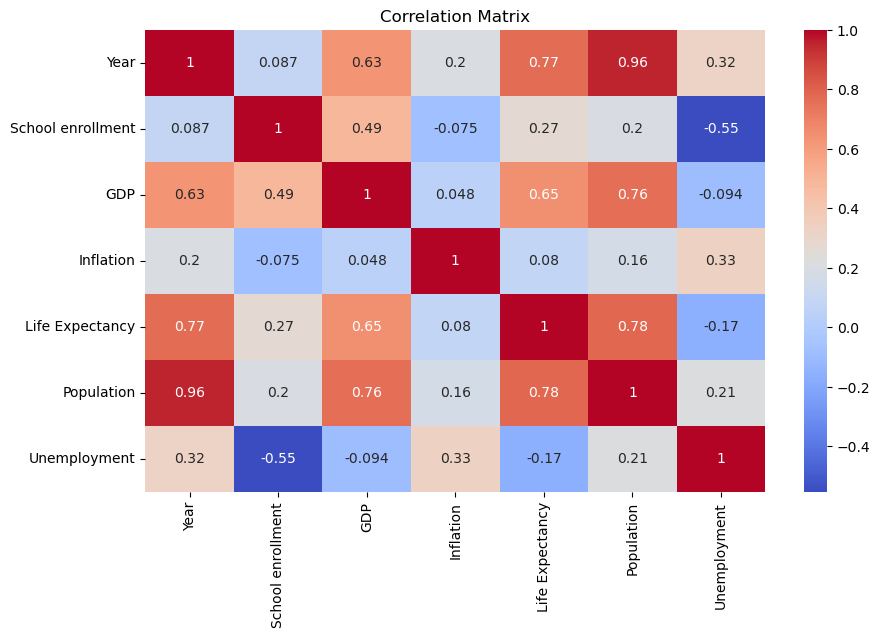

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**An overview of our indicators during the Syrian war years**

C:\Users\Mhmd Qutainy\AppData\Local\Temp\ipykernel_6488\431044360.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(filtered_df['Year'], rotation=90)
C:\Users\Mhmd Qutainy\AppData\Local\Temp\ipykernel_6488\431044360.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(filtered_df['Year'], rotation=90)
C:\Users\Mhmd Qutainy\AppData\Local\Temp\ipykernel_6488\431044360.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(filtered_df['Year'], rotation=90)
C:\Users\Mhmd Qutainy\AppData\Local\Temp\ipykernel_6488\431044360.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1

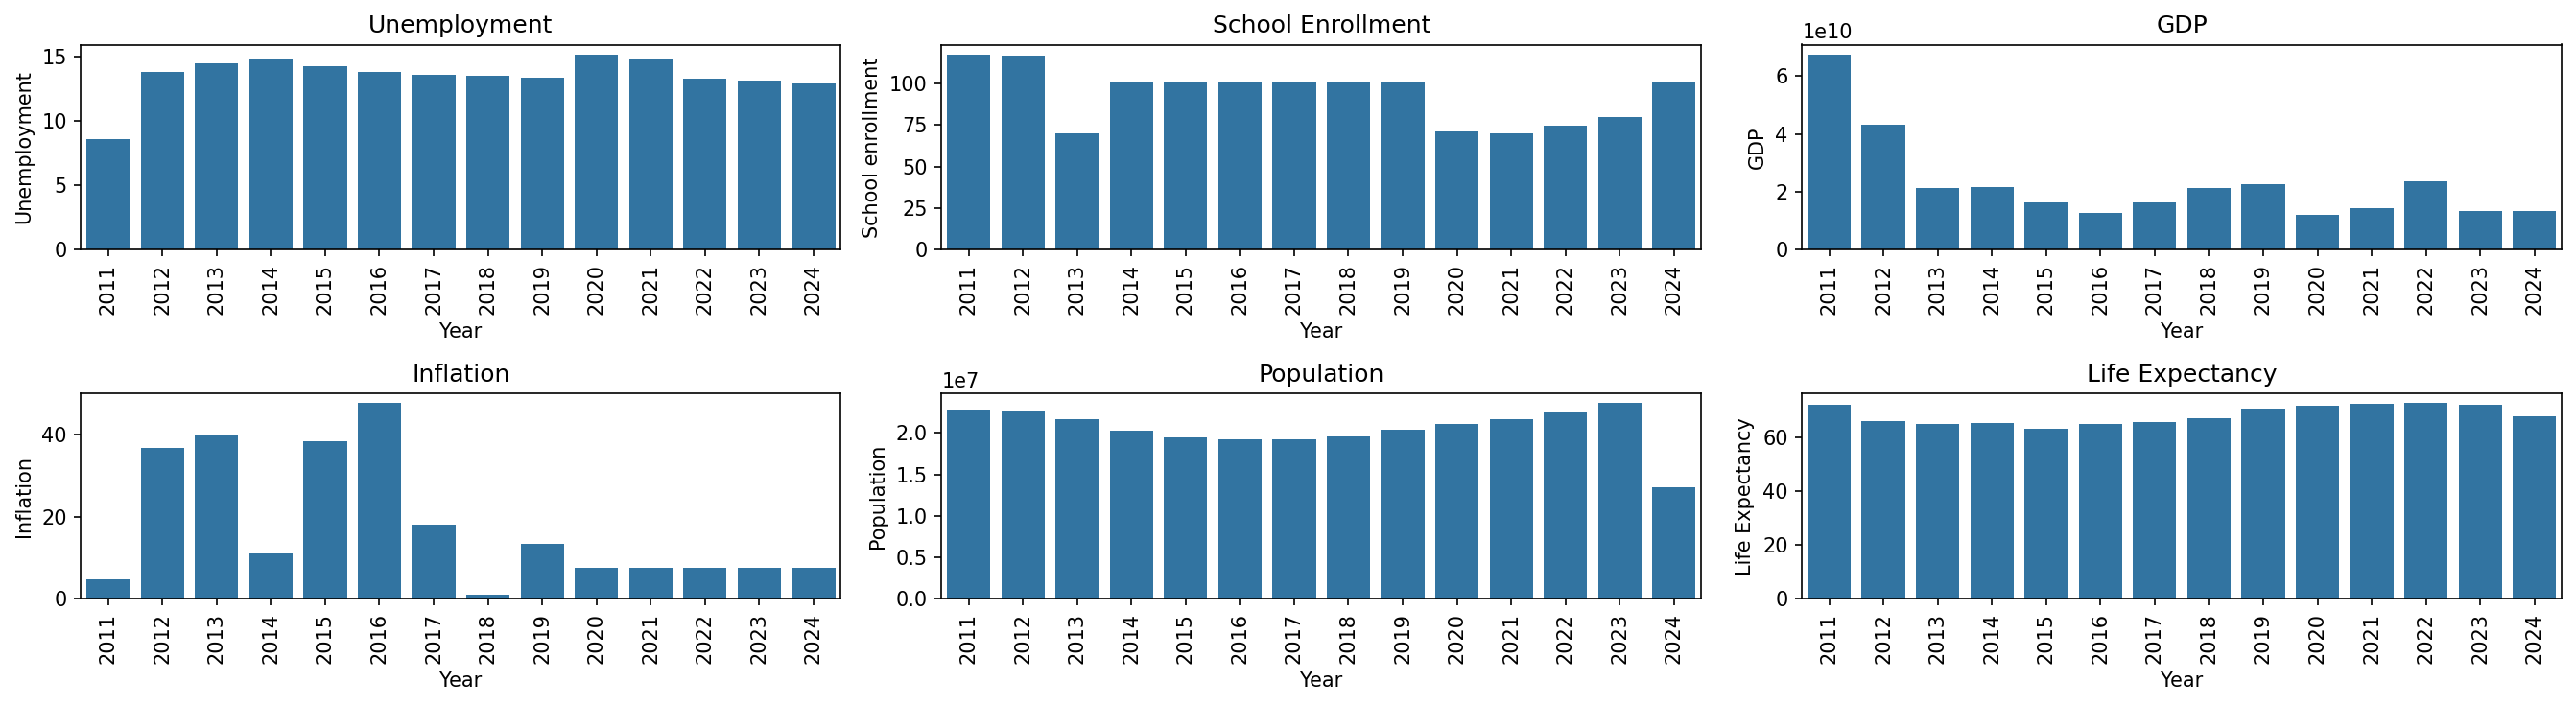

In [24]:

#Data filtering between 2011 and 2024, i.e. during the Syrian war

filtered_df = df[(df['Year'] >= 2011) & (df['Year'] <= 2024)]

fig, axes = plt.subplots(2, 3, figsize=(18, 5), dpi=150)

sns.barplot(x='Year', y='Unemployment', data=filtered_df, ax=axes[0, 0])
axes[0, 0].set_title('Unemployment')
axes[0, 0].set_xticklabels(filtered_df['Year'], rotation=90)

sns.barplot(x='Year', y='School enrollment', data=filtered_df, ax=axes[0, 1])
axes[0, 1].set_title('School Enrollment')
axes[0, 1].set_xticklabels(filtered_df['Year'], rotation=90)

sns.barplot(x='Year', y='GDP', data=filtered_df, ax=axes[0, 2])
axes[0, 2].set_title('GDP')
axes[0, 2].set_xticklabels(filtered_df['Year'], rotation=90)

sns.barplot(x='Year', y='Inflation', data=filtered_df, ax=axes[1, 0])
axes[1, 0].set_title('Inflation')
axes[1, 0].set_xticklabels(filtered_df['Year'], rotation=90)

sns.barplot(x='Year', y='Population', data=filtered_df, ax=axes[1, 1])
axes[1, 1].set_title('Population')
axes[1, 1].set_xticklabels(filtered_df['Year'], rotation=90)

sns.barplot(x='Year', y='Life Expectancy', data=filtered_df, ax=axes[1, 2])
axes[1, 2].set_title('Life Expectancy')
axes[1, 2].set_xticklabels(filtered_df['Year'], rotation=90)

plt.tight_layout()
plt.show()


**What are the top ten years in which Syria had the highest Gross Domestic Product (GDP) in US dollars?**

C:\Users\Mhmd Qutainy\AppData\Local\Temp\ipykernel_6488\4205063649.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='GDP', data=top10_gdp, palette='viridis')


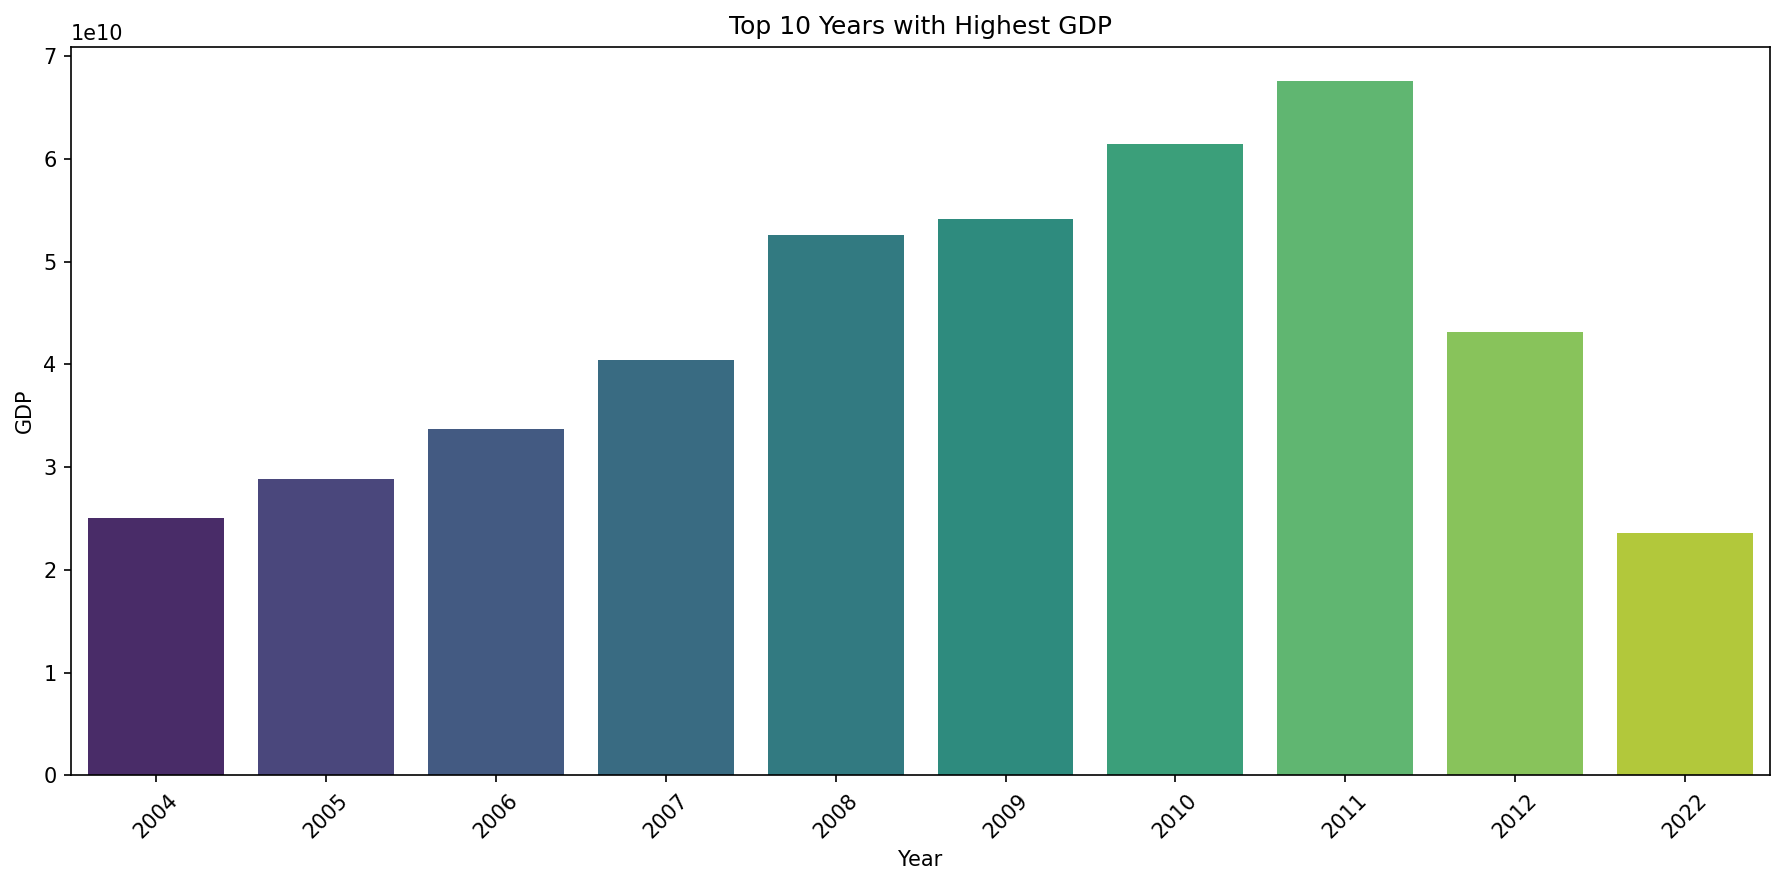

In [25]:
top10_gdp = df.sort_values(by='GDP', ascending=False).head(10)

top10_gdp = top10_gdp.sort_values(by='Year')

plt.figure(figsize=(12,6), dpi=150)
sns.barplot(x='Year', y='GDP', data=top10_gdp, palette='viridis')
plt.title('Top 10 Years with Highest GDP')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.tight_layout()
plt.show()


**How has the Gross Domestic Product (GDP) changed over time? Is there steady growth or are there fluctuations?**

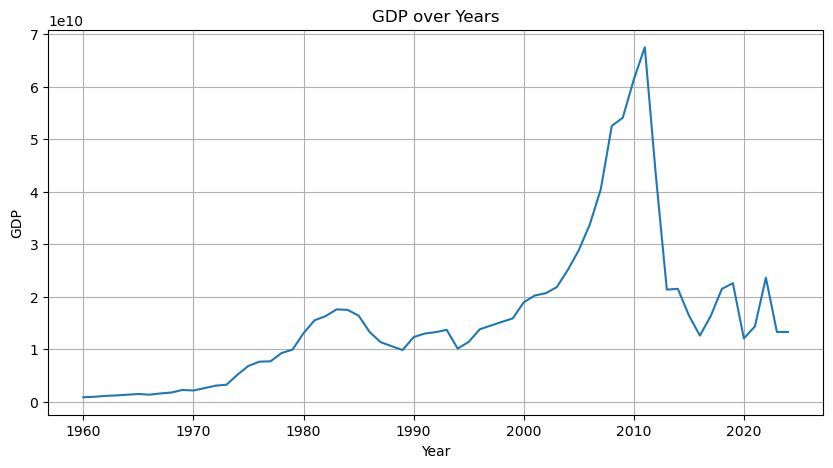

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='GDP', data=df)
plt.title('GDP over Years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.show()
#We notice after 2011 that it was strongly affected by the Syrian war

**Is there a relationship between the unemployment rate and life expectancy?**

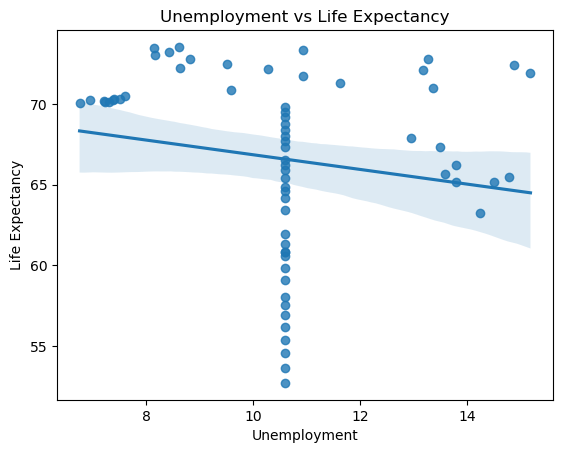

In [27]:
sns.regplot(x='Unemployment', y='Life Expectancy', data=df)
plt.title('Unemployment vs Life Expectancy')
plt.show()
##The inverse relationship exists but is weak: Increased unemployment may be associated with a slight decrease in life expectancy 
#so the relationship is not very strong or clear in the data.

**Does high inflation affect school enrollment?**

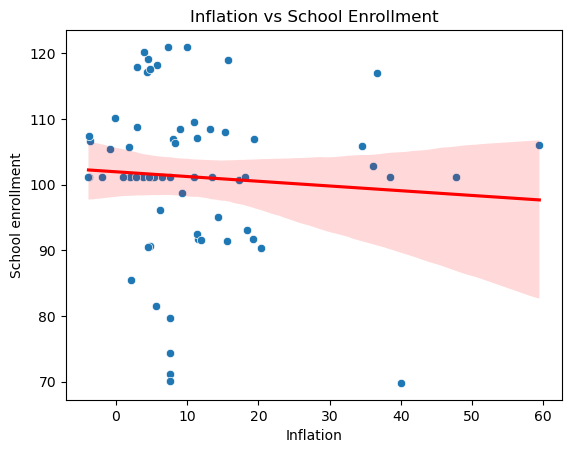

In [28]:
sns.scatterplot(x='Inflation', y='School enrollment', data=df)
sns.regplot(x='Inflation', y='School enrollment', data=df, scatter=False, color='red')
plt.title('Inflation vs School Enrollment')
plt.show()
#There is no clear relationship between them

**Which years recorded the highest unemployment rates? Were these rates associated with any specific events?**

In [29]:
df[['Year', 'Unemployment']].sort_values(by='Unemployment', ascending=False).head()
#We note that the Syrian war has a great impact.

,Year,Unemployment
60,2020,15.191
61,2021,14.877
54,2014,14.783
53,2013,14.500
55,2015,14.243


**Which years recorded the lowest unemployment rates? Were these rates associated with any specific events?**

In [30]:
df[['Year', 'Unemployment']].sort_values(by='Unemployment', ascending=True).head()


,Year,Unemployment
31,1991,6.750
32,1992,6.949
35,1995,7.200
36,1996,7.222
37,1997,7.310


**Is there a strong correlation between population size and GDP? Is population growth beneficial for the GDP?**

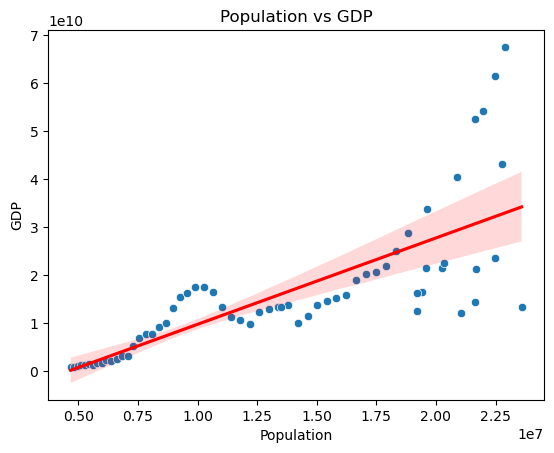

In [31]:
sns.scatterplot(x='Population', y='GDP', data=df)
sns.regplot(x='Population', y='GDP', data=df, scatter=False, color='red')
plt.title('Population vs GDP')
plt.show()
#The more the population increases, the more the value of the gross domestic product increases annually.

**What is the relationship between population and inflation? Does population growth cause inflation?**

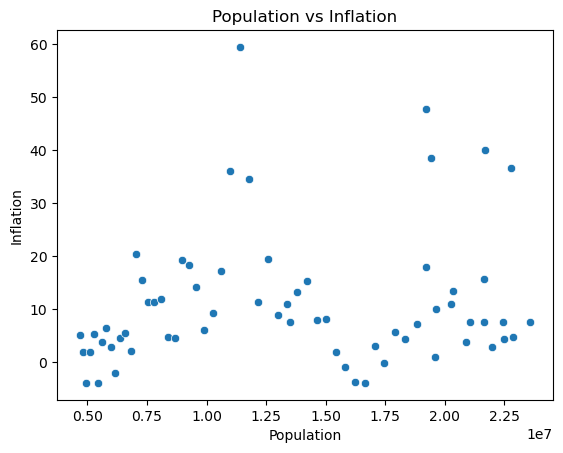

In [32]:
sns.scatterplot(x='Population', y='Inflation', data=df)
plt.title('Population vs Inflation')
plt.show()
#A very simple relationship between them that cannot be considered a basic relationship.

**How has school enrollment changed over time? Has it increased or decreased?**

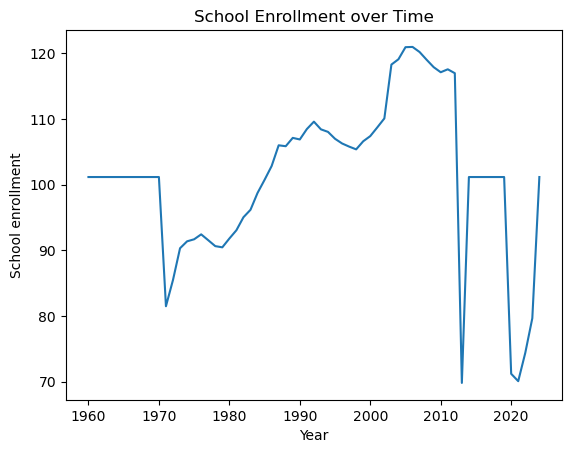

In [33]:
sns.lineplot(x='Year', y='School enrollment', data=df)
plt.title('School Enrollment over Time')
plt.show()
#We note that during the years of the Syrian crisis, the lowest percentage of school enrollments.

**Are there other factors that affect life expectancy despite high unemployment?**

In [35]:
df[(df['Life Expectancy'] > df['Life Expectancy'].mean()) & (df['Unemployment'] > df['Unemployment'].mean())]
#We note that there are other factors that increase the average life expectancy of an individual other than the increase in unemployment.

##This is due to several factors, including:
#The presence of other factors that play a major role, such as:

#-Improvement in healthcare.

#-Reduced infant mortality rates.

#-Social or environmental support.

#-Or even errors in economic reporting.

,Country Name,Year,School enrollment,GDP,Inflation,Life Expectancy,Population,Unemployment
23,Syrian Arab Republic,1983,96.152443,1.758928e+10,6.127292,67.3500,9.904809e+06,10.589206
24,Syrian Arab Republic,1984,98.716042,1.750308e+10,9.229518,67.7230,1.025840e+07,10.589206
25,Syrian Arab Republic,1985,100.716492,1.640354e+10,17.252931,68.0480,1.062567e+07,10.589206
26,Syrian Arab Republic,1986,102.810410,1.329321e+10,36.063492,68.4150,1.100284e+07,10.589206
27,Syrian Arab Republic,1987,105.968903,1.135622e+10,59.484368,68.7970,1.138892e+07,10.589206
28,Syrian Arab Republic,1988,105.830627,1.057704e+10,34.562212,69.1720,1.178226e+07,10.589206
29,Syrian Arab Republic,1989,107.099083,9.853396e+09,11.399217,69.4860,1.217906e+07,10.589206
30,Syrian Arab Republic,1990,106.858238,1.230862e+10,19.396867,69.8300,1.257921e+07,10.589206
41,Syrian Arab Republic,2001,108.697281,2.023702e+10,3.000000,71.2960,1.705134e+07,11.630000
42,Syrian Arab Republic,2002,110.061203,2.066936e+10,-0.130505,71.7420,1.746833e+07,10.940000


**Is there a strong correlation between population size and Life Expectancy? Is population growth beneficial for the Life Expectancy?**

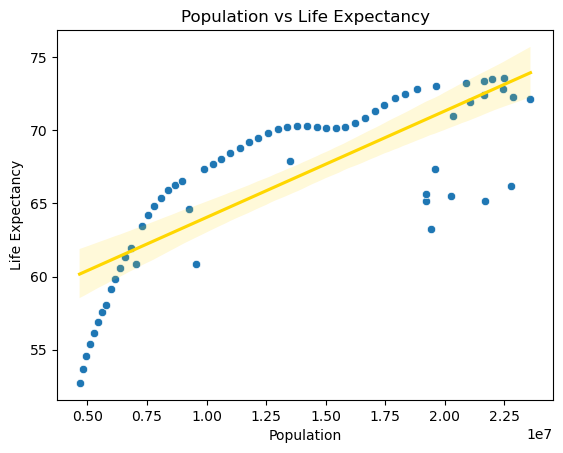

In [40]:
sns.scatterplot(x='Population', y='Life Expectancy', data=df)
sns.regplot(x='Population', y='Life Expectancy', data=df, scatter=False, color='gold')
plt.title('Population vs Life Expectancy')
plt.show()
#There is clear relationship between them

**Is there a relationship between life expectancy and GDP?**

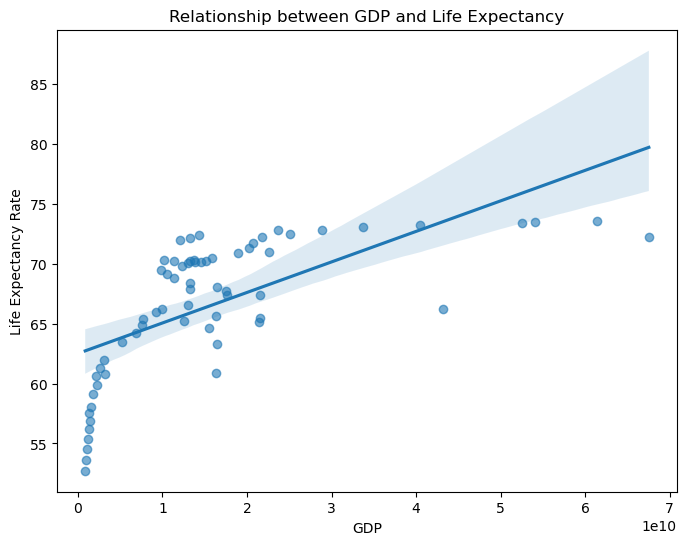

In [46]:

plt.figure(figsize=(8,6), dpi=100)
sns.regplot(x='GDP', y='Life Expectancy', data=df, scatter_kws={'alpha':0.6})
plt.title('Relationship between GDP and Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy Rate')
plt.show()


**What is the average life expectancy in Syria, excluding the years of the Syrian war?**

In [53]:
filtered_df = df[(df['Year'] < 2011)]

mean_life_expectancy = filtered_df['Life Expectancy'].mean()
round(mean_life_expectancy,2)

66.07

**What is the average inflation in syria excluding the years of the syrian war?**

In [54]:
filtered_df = df[(df['Year'] < 2011)]

mean_life_expectancy = filtered_df['Inflation'].mean()
round(mean_life_expectancy,2)

9.24

**What is the average Inflation in Syria after the Syrian war?**

In [56]:
filtered_df = df[(df['Year'] >= 2011)]

mean_life_expectancy = filtered_df['Inflation'].mean()
round(mean_life_expectancy,2)

17.79

**Which ten years recorded the highest school enrollment figures?**

In [57]:
top10_education = df.sort_values(by='School enrollment', ascending=False).head(10)

top10_education = top10_education[['Year', 'School enrollment']]

top10_education[['Year', 'School enrollment']]

,Year,School enrollment
46,2006,120.943916
45,2005,120.904053
47,2007,120.168663
44,2004,119.067451
48,2008,118.987717
43,2003,118.255402
49,2009,117.862602
51,2011,117.537750
50,2010,117.089661
52,2012,116.944237


**What are the distributions and potential outliers of the key economic and social indicators (GDP, School Enrollment, Population, Unemployment, Inflation, Life Expectancy) in the dataset?**

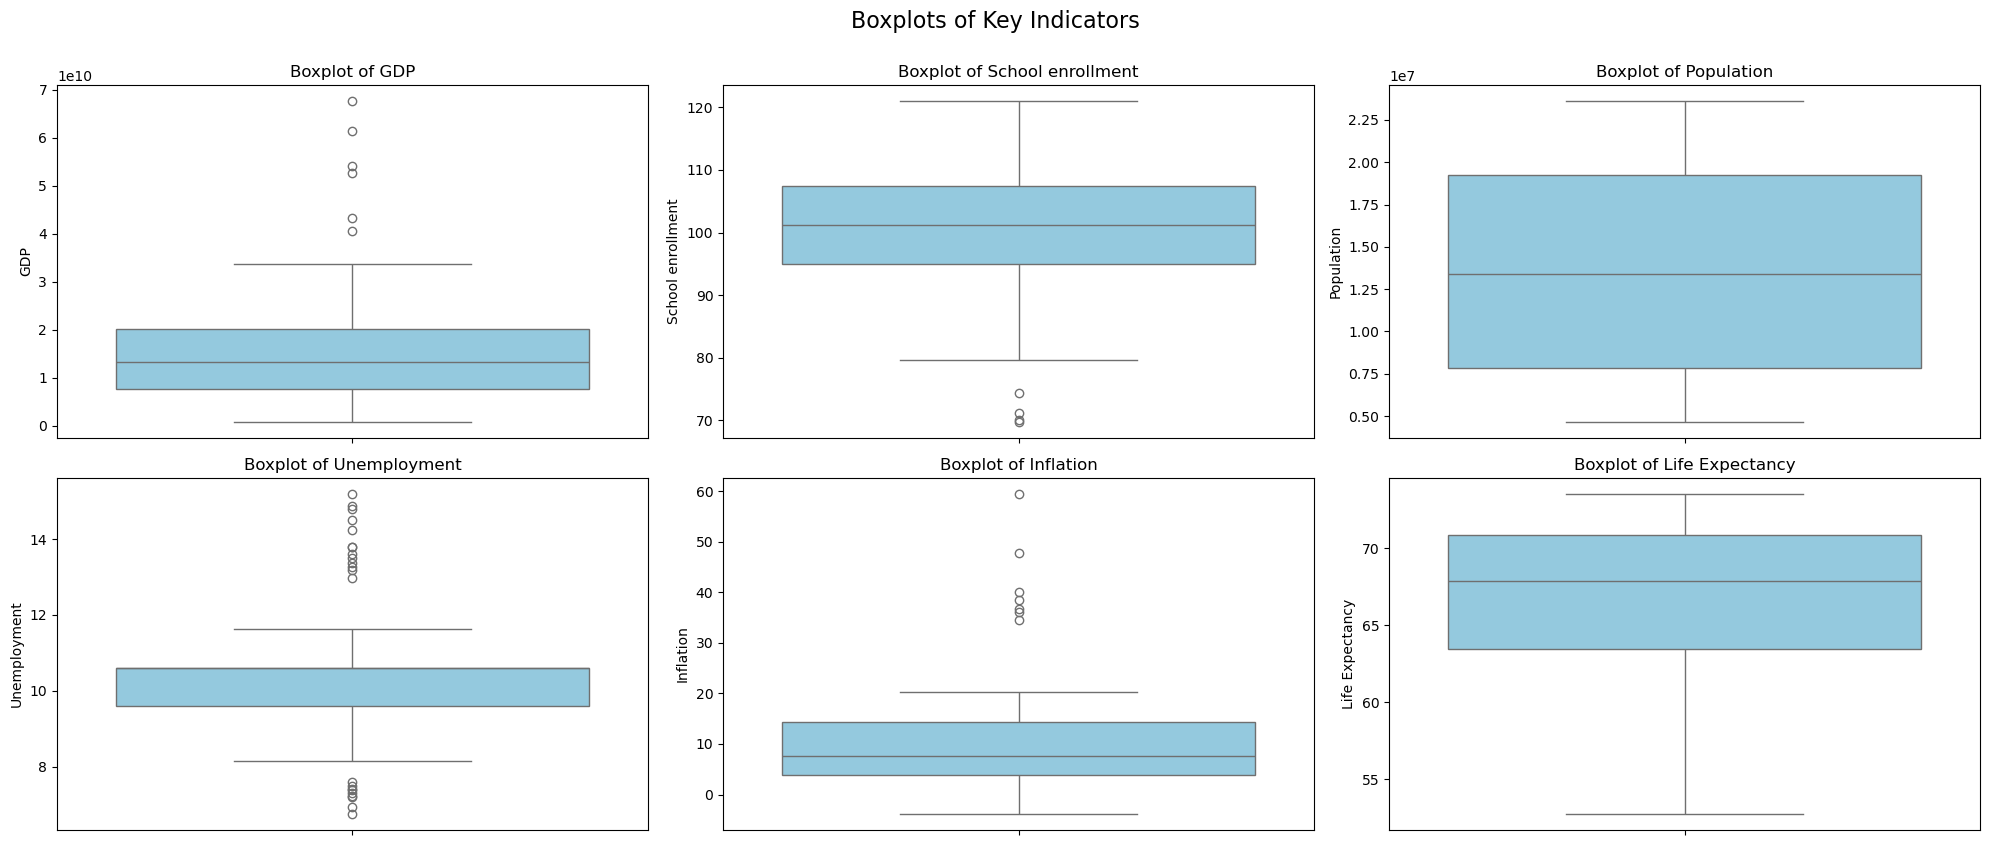

In [36]:
cols = ['GDP', 'School enrollment', 'Population', 'Unemployment', 'Inflation', 'Life Expectancy']
plt.figure(figsize=(20, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  # 2 صفوف، 3 أعمدة
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Boxplots of Key Indicators', fontsize=16, y=1.05)
plt.show()
